# 코사인 유사도 (Cosine Similarity)

두 벡터 간의 코사인 각도를 이용하여 두 벡터의 유사도를 판단.<br>
-1~1의 값을 가지며 1일수록 유사

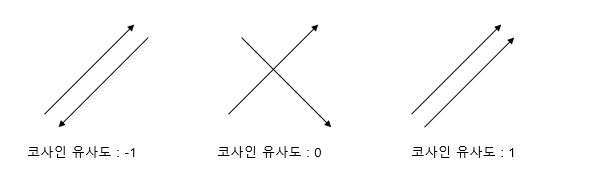


$similarity=cos(Θ)=\frac{A⋅B}{||A||\ ||B||}=\frac{\sum_{i=1}^{n}{A_{i}×B_{i}}}{\sqrt{\sum_{i=1}^{n}(A_{i})^2}×\sqrt{\sum_{i=1}^{n}(B_{i})^2}}$


In [1]:
# 단순 문장 비교

from numpy import dot
from numpy.linalg import norm
import numpy as np

In [2]:
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [3]:
doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

In [4]:
print('cos doc1, doc2:', cos_sim(doc1, doc2))
print('cos doc1, doc3:', cos_sim(doc1, doc3))
print('cos doc2, doc3:', cos_sim(doc2, doc3))

cos doc1, doc2: 0.6666666666666667
cos doc1, doc3: 0.6666666666666667
cos doc2, doc3: 1.0000000000000002


# 유사도를 이용한 추천 시스템

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [10]:
data = data.head(20000)

In [11]:
# 유사도 파악을 위해 title, overview 컬럼을 사용할 예정
print('overview 열의 결측값의 수:', data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [12]:
data['overview'] = data['overview'].fillna('')

In [13]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape):', tfidf_matrix.shape) # 문서 20000, 단어 47487

TF-IDF 행렬의 크기(shape): (20000, 47487)


In [18]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('cos sim result:', cosine_sim.shape)

cos sim result: (20000, 20000)


In [15]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [19]:
# 제목을 선택하면 코사인 유사도가 가장 높은 10개 항목 리턴하는 예제
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = title_to_index[title] # 지정된 title의 index

    sim_scores = list(enumerate(cosine_sim[idx])) # index 항목의 모든 유사항목 추출
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # 유사도 내림차순 정렬
    sim_scores = sim_scores[1:11] # 자기 자신 빼고 유사한 10개 항목 가져오기
    movie_indices = [idx[0] for idx in sim_scores] # 상위 10개 영화의 인덱스

    return data['title'].iloc[movie_indices] # 영화의 title만 리턴

In [20]:
get_recommendations('The Dark Knight Rises')

,title
12481,The Dark Knight
150,Batman Forever
1328,Batman Returns
15511,Batman: Under the Red Hood
585,Batman
9230,Batman Beyond: Return of the Joker
18035,Batman: Year One
19792,"Batman: The Dark Knight Returns, Part 1"
3095,Batman: Mask of the Phantasm
10122,Batman Begins
